### word2vec-Edin Logistic Regression

In [ ]:
# pre-Trained model link:https://affectivetweets.cms.waikato.ac.nz/
# reference github repo:https://github.com/frosinastojanovska/TwitterEmotionDetection
# To download the pre-trained model and load it, please run the transform_csv_w2v.py

In [64]:
# It takes several minutes to load the model
# only run it once
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('w2v.twitter.edinburgh10M.400d.txt.word2vec')

KeyboardInterrupt: 

In [67]:
# test
print(model.most_similar(positive="obama"))
print(len(model['obama']))

[('obamas', 0.7016106843948364), ('bho', 0.6924901008605957), ('#obama', 0.677671492099762), ('obamaâ\x80\x99s', 0.672095775604248), ('potus', 0.6554491519927979), ('karzai', 0.6271429657936096), ('zardari', 0.5904218554496765), ('medvedev', 0.5850324034690857), ('palin', 0.5791465044021606), ('netanyahu', 0.5740561485290527)]
400


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score

#### Read Cleaned Data

In [69]:
# load the dataset
oba_cleanall = np.load('./TrainData/tweets_oba.npy', allow_pickle=True)
targets_oba = np.load('./TrainData/targets_oba.npy', allow_pickle=True)
rom_cleanall = np.load('./TrainData/tweets_rom.npy', allow_pickle=True)
targets_rom = np.load('./TrainData/targets_rom.npy', allow_pickle=True)
df_oba = pd.DataFrame({'tweet':oba_cleanall, 'label': targets_oba })
df_rom = pd.DataFrame({'tweet':rom_cleanall, 'label': targets_rom })

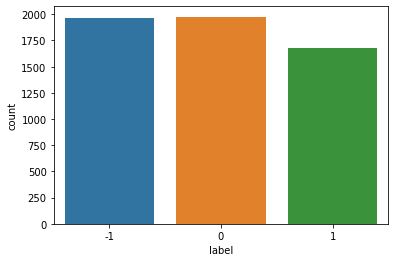

In [70]:
sns.countplot(df_oba['label'])

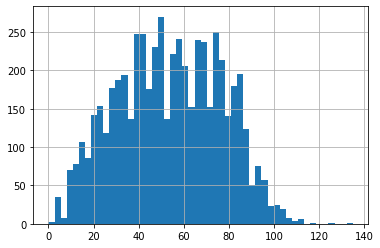

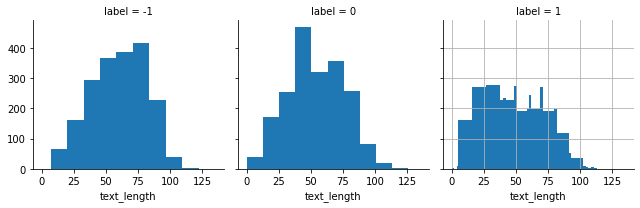

In [71]:
df_oba['text_length'] = df_oba['tweet'].apply(len)
df_oba[['label','text_length','tweet']].head()
df_oba['text_length'].describe()
df_oba['text_length'].hist(bins=50)
g = sns.FacetGrid(df_oba,col='label')
g.map(plt.hist,'text_length')

df_rom['text_length'] = df_rom['tweet'].apply(len)
df_rom[['label','text_length','tweet']].head()
df_rom['text_length'].describe()
df_rom['text_length'].hist(bins=50)
# g = sns.FacetGrid(df_rom,col='label')
# g.map(plt.hist,'text_length')

In [ ]:
#Preparing Vectors for Tweets
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [72]:
# Preparing word2vec feature set…
tokenized_tweet = df_oba['tweet'].apply(lambda x: x.split())

wordvec_arrays = np.zeros((len(tokenized_tweet), 400))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 400)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(5624, 400)

In [80]:
train_w2v, test_w2v, train_Y, test_Y = train_test_split(wordvec_df, df_oba['label'], test_size = 0.2, random_state = 42)

In [98]:
# Logistic Regression,
logisticReg = LogisticRegressionCV(cv=5 ,solver='lbfgs', verbose=0)
logisticReg.fit(train_w2v, train_Y)
Y_lr_predict=logisticReg.predict(test_w2v)

print("Logistic Regression - Training Result")
print(classification_report(logisticReg.predict(train_w2v),train_Y,digits=4))
print("Logistic Regression - Validation Result")
print(classification_report(Y_lr_predict,test_Y, digits=4))

# prediction = logisticReg.predict_proba(test_w2v)
#
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)
#
# f1_score(test_Y, prediction_int)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression - Training Result
              precision    recall  f1-score   support

          -1     0.7025    0.6522    0.6764      1702
           0     0.6177    0.6316    0.6246      1550
           1     0.6409    0.6856    0.6625      1247

    accuracy                         0.6544      4499
   macro avg     0.6537    0.6565    0.6545      4499
weighted avg     0.6562    0.6544    0.6547      4499

Logistic Regression - Validation Result
              precision    recall  f1-score   support

          -1     0.6443    0.5531    0.5952       452
           0     0.5204    0.5383    0.5292       379
           1     0.5275    0.6190    0.5696       294

    accuracy                         0.5653      1125
   macro avg     0.5641    0.5701    0.5647      1125
weighted avg     0.5721    0.5653    0.5663      1125



In [93]:
# Spelling Check
from textblob import TextBlob
blob = TextBlob("aaaand romney is still an idiot nospecifics cantanswerhow obama")
print(blob.correct())

aaaand money is still an idiot nospecifics cantanswerhow drama


In [ ]:
# Grammar Check?
# import language_tool_python
# tool = language_tool_python.LanguageTool('en-US')

In [85]:
# MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
MLP = MLPClassifier(random_state = 42)
mlp_param_grid = {
    'hidden_layer_sizes':[(5)],
    'activation':['relu'],
    'solver':['adam'],
    'alpha':[0.3],
    'learning_rate':['constant'],
    'max_iter':[1000]
}
kfold = StratifiedKFold( n_splits = 5, random_state = 42, shuffle=True )
gsMLP = GridSearchCV(MLP, param_grid = mlp_param_grid, cv = kfold, n_jobs= 1, verbose = 1)
gsMLP.fit(train_w2v, train_Y)
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_
gsMLP.best_score_
MLP_Y_predict = gsMLP.predict(test_w2v)
print("MLP Classifier - Training Result")
print(classification_report(gsMLP.predict(train_w2v),train_Y,digits=4))
print("MLP Classifier - Validation Result")
print(classification_report(MLP_Y_predict,test_Y, digits=4))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.3s finished


In [94]:
# SVM
from sklearn import svm
clf = svm.LinearSVC(max_iter=2000)
clf.fit(train_w2v, train_Y)
clf_Y_predict = clf.predict(test_w2v)
print("Linear Support Vector Classification - Training Result")
print(classification_report(clf.predict(train_w2v),train_Y,digits=4))
print("Linear Support Vector Classification - Validation Result")
print(classification_report(clf_Y_predict,test_Y, digits=4))

Linear Support Vector Classification - Training Result
              precision    recall  f1-score   support

          -1     0.7101    0.6240    0.6643      1798
           0     0.5779    0.6123    0.5946      1496
           1     0.6072    0.6722    0.6380      1205

    accuracy                         0.6330      4499
   macro avg     0.6317    0.6362    0.6323      4499
weighted avg     0.6386    0.6330    0.6341      4499

Linear Support Vector Classification - Validation Result
              precision    recall  f1-score   support

          -1     0.6778    0.5525    0.6088       476
           0     0.5026    0.5487    0.5246       359
           1     0.5130    0.6103    0.5575       290

    accuracy                         0.5662      1125
   macro avg     0.5645    0.5705    0.5636      1125
weighted avg     0.5794    0.5662    0.5687      1125



In [101]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgb.fit(train_w2v, train_Y)
xgb_Y_predict = xgb.predict(test_w2v)
print("XGBoost - Training Result")
print(classification_report(xgb.predict(train_w2v),train_Y,digits=4))
print("XGBoost - Validation Result")
print(classification_report(xgb_Y_predict,test_Y, digits=4))


XGBoost - Training Result
              precision    recall  f1-score   support

          -1     0.9905    0.9949    0.9927      1573
           0     0.9823    0.9911    0.9867      1571
           1     0.9955    0.9801    0.9877      1355

    accuracy                         0.9891      4499
   macro avg     0.9894    0.9887    0.9890      4499
weighted avg     0.9892    0.9891    0.9891      4499

XGBoost - Validation Result
              precision    recall  f1-score   support

          -1     0.6495    0.5727    0.6087       440
           0     0.5332    0.5457    0.5394       383
           1     0.5623    0.6424    0.5997       302

    accuracy                         0.5822      1125
   macro avg     0.5817    0.5869    0.5826      1125
weighted avg     0.5865    0.5822    0.5827      1125

